# <center><span style="color:red">Cálculo Numérico - Avaliação - 01</span><br/></center>


## <center><span style="color:green">Exercício  00</span><br/></center>


In [ ]:
!pip install -r requirements.txt

In [2]:
from fractions import Fraction
import math
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

### <center><span style="color:blue">Calculando matriz de Hilbert de ordem 4</span><br/></center>

In [3]:
def Hilbert_matrix_string(a, b):
    return [[str(Fraction(1 / (i + j + 1)).limit_denominator()) for j in range(b)] for i in range(a)]

Hilbert_order_4_matrix = Hilbert_matrix_string(4,4)
print("Matriz de Hilbert ordem 4:")
Hilbert_order_4_matrix

Matriz de Hilbert ordem 4:


[['1', '1/2', '1/3', '1/4'],
 ['1/2', '1/3', '1/4', '1/5'],
 ['1/3', '1/4', '1/5', '1/6'],
 ['1/4', '1/5', '1/6', '1/7']]

### <center><span style="color:blue">Calculando matriz inversa</span><br/></center>

In [4]:
def Hilbert_matrix_array(a, b):
    return np.array([[Fraction(1 / (i + j + 1)).limit_denominator() for j in range(b)] for i in range(a)])

hilbert_matrix_array_order_4 = Hilbert_matrix_array(4,4).astype('float64')
Hilbert_inverse_matrix_array_order_4 = np.linalg.inv(hilbert_matrix_array_order_4)
print("\n\nMatriz inversa de Hilbert de ordem 4:")
Hilbert_inverse_matrix_array_order_4



Matriz inversa de Hilbert de ordem 4:


array([[   16.,  -120.,   240.,  -140.],
       [ -120.,  1200., -2700.,  1680.],
       [  240., -2700.,  6480., -4200.],
       [ -140.,  1680., -4200.,  2800.]])

### <center><span style="color:blue">Descrevendo vetor solução usando pinv (pseudo-inverse) function</span><br/></center>

In [5]:
pinv = np.linalg.pinv(hilbert_matrix_array_order_4)
b = [0 ,1, 10, 100]
solution_vector = pinv.dot(b)
print("O vetor solucao é dado por:")
solution_vector.tolist()

O vetor solucao é dado por:


[-11719.999999997157,
 142199.99999996758,
 -357899.99999992223,
 239679.9999999497]

## <center><span style="color:green">Exercício 01 - Parte a: Calculando xm para altura máxima</span><br/></center>

In [6]:
x = symbols('x')

g, y0, v0, m, c = 9.81, 100, 55, 80, 15
y = y0 + (m / c) * (v0 + ((m * g) / c)) * (1 - exp(- (c / m) * x)) - ((m * g) / c) * x
print('Equacao:')
y

Equacao:


-52.32*x + 672.373333333333 - 572.373333333333*exp(-0.1875*x)

## Altura maxima de xm é dada para y'(x) = 0

In [7]:
y_diff = diff(y)
print("y(x)' = ", y_diff)
print("Calculando y(x)'= 0, resulta em xm, em metros, com o valor de")
solve(y_diff)[0]

y(x)' =  -52.32 + 107.32*exp(-0.1875*x)
Calculando y(x)'= 0, resulta em xm, em metros, com o valor de


3.83166036484523

## <center><span style="color:green">Parte B - Calculando x para y(x) = 0</span><br/></center>

In [8]:
print("Valor de y(x) = 0: ")
solve(y, rational = False)[0]

Valor de y(x) = 0: 


11.6108384710610

### <center><span style="color:blue">O processo deve ser iterativo, pois a equacao -52.32 * x + 672.373333333333 - 572.373333333333 * exp(-0.1875 * x) = 0 nao possui uma fórmula simples para resolucao da equacao.</span><br/></center>

In [9]:
def Jacobian(v_str, f_list):
    vars = symbols(v_str)
    f = sympify(f_list)
    J = zeros(len(f),len(vars))
    for i, fi in enumerate(f):
        for j, s in enumerate(vars):
            J[i,j] = diff(fi, s)
    return J

## <center><span style="color:green">Exercicio 02 parte a - Resolvendo o primeiro sistema de equacoes</span><br/></center>

In [10]:
x, y = symbols('x y')
f1 = x**2 + y**2
f2 = -exp(x) + y
print("Usando como chute inicial o par (I,I), pois a equacao nao possui solucoes reais, por conta de x² + y² = 0 possuir solucoes complexas, a solucao é dada por:")
nsolve((f1, f2), (x, y), (I, I))


Usando como chute inicial o par (I,I), pois a equacao nao possui solucoes reais, por conta de x² + y² = 0 possuir solucoes complexas, a solucao é dada por:


Matrix([
[-0.374699020737117 + 0.576412723031435*I],
[ 0.576412723031435 + 0.374699020737117*I]])

In [11]:
print("Matriz Jacobiana do sistema:")
Jacobian('x y',['x**2 + y**2', '-exp(x) + y'])

Matriz Jacobiana do sistema:


Matrix([
[    2*x, 2*y],
[-exp(x),   1]])

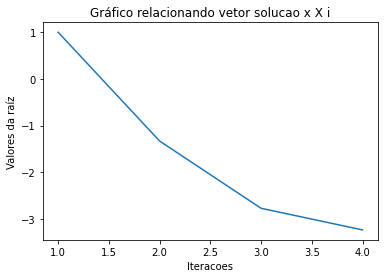

In [12]:
x = [1,2,3,4]

y = [1, -1.33,-2.77,-3.233]
 
plt.plot(x, y)
 
plt.xlabel('Iteracoes')

plt.ylabel('Valores da raíz')
 
plt.title('Gráfico relacionando vetor solucao x X i')

plt.show()

## <center><span style="color:green">Exercicio 02 parte b - Mostrando que o segundo sistema de equacoes possui infinitas solucoes</span><br/></center>

In [13]:
print("Matriz Jacobiana do sistema:")
jacobian_matrix = Jacobian('x y', ['-exp(x) + y','-sin(x) + y'])
jacobian_matrix

Matriz Jacobiana do sistema:


Matrix([
[-exp(x), 1],
[-cos(x), 1]])

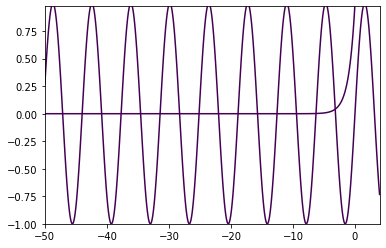

In [14]:
delta = 0.025
x, y = np.meshgrid(np.arange(-50, 4, delta),np.arange(-1, 1, delta))

plt.contour(x, y,- np.sin(x) + y, [0]
)
plt.contour(x, y, -np.exp(x) + y, [0])
plt.show()

### <center><span style="color:blue">Como mostrado no gráfico, o sistema possui infinitas solucoes.</span><br/></center>

## <center><span style="color:green">Exercicio 03 - descobrindo valor de d</span><br/></center>

In [15]:
d = symbols('d')
k1, k2, m, g, h = 40000, 40, 95, 9.81, 0.43 
f = -(k1 * d + k2 * d ** (3/2))
energy_conservation = (2 * k2 * d ** (5/2))/5 + (1/2) * k1 * d ** 2 - m *g * d - m * g *h
print("Equacao:")
energy_conservation


Equacao:


20000.0*d**2 - 931.95*d + 16*d**2.5 - 400.7385

In [16]:
print("Com a aproximacao inicial de d = 0.4, o valor de d, em metros, é igual a:")
nsolve(energy_conservation,0.4)

Com a aproximacao inicial de d = 0.4, o valor de d, em metros, é igual a:


0.166723562437785